In [65]:
import gensim
import string
import os
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ericchagnon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ericchagnon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ericchagnon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ericchagnon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# PATH = 'archive/'
# files = os.listdir(PATH)

# combined_df = pd.DataFrame()

# all_df = []

# for file in files:
#     temp = pd.read_csv(PATH + file)
#     all_df.append(temp)



In [2]:
data = pd.read_csv('208_data/bbc_news.csv')
concat_data = data['title'] + " " +data['description']
article_list = concat_data.tolist()

In [60]:
# # combined_df = pd.concat(all_df)['full_text']


# # tweet_list = combined_df.tolist() #list of tweets 
# lemma = WordNetLemmatizer()



# new_list = []

# #removed numbers at the end of the string
# for string in article_list:
#     # Cleaning links
#     print(string)
#     string = re.sub(r'http\S+', '', string)
    
    
    
    
#     # Cleaning everything except alphabetical and numerical characters
#     string = re.sub("[^a-zA-Z0-9]"," ",string).lower()
    
#     string = [lemma.lemmatize(word) for word in string]
    
 
    
#     string = "".join(string)
    
        
#     new_list.append(string)


Ukraine: Angry Zelensky vows to punish Russian atrocities The Ukrainian president says the country will not forgive or forget those who murder its civilians.
War in Ukraine: Taking cover in a town under attack Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee.
Ukraine war 'catastrophic for global food' One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.
Manchester Arena bombing: Saffie Roussos's parents on hearing the truth The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.
Ukraine conflict: Oil price soars to highest level since 2008 Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.
Ukraine war: PM to hold talks with world leaders on further sanctions Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs.
Ukraine war: UK grants 50 Ukrainian refugee

['ukraine  angry zelensky vows to punish russian atrocities the ukrainian president says the country will not forgive or forget those who murder its civilians ',
 'war in ukraine  taking cover in a town under attack jeremy bowen was on the frontline in irpin  as residents came under russian fire while trying to flee ',
 'ukraine war  catastrophic for global food  one of the world s biggest fertiliser firms says the conflict could deliver a shock to food supplies ',
 'manchester arena bombing  saffie roussos s parents on hearing the truth the parents of the manchester arena bombing s youngest victim speak about their life since she died ',
 'ukraine conflict  oil price soars to highest level since 2008 consumers are feeling the impact of higher energy costs as fuel prices and household bills jump ',
 'ukraine war  pm to hold talks with world leaders on further sanctions boris johnson is to meet the canadian and dutch pms  as mps debate new laws targeting oligarchs ',
 'ukraine war  uk g

In [115]:
tokenizer = nltk.tokenize #.split() is better lol
lemma = WordNetLemmatizer()
swords = stopwords.words("english")


new_list = []

for article in article_list:
    
    clean_article = []
    
    #tokenize the single string article into an array of strings for each word
    tokenized_article = article.lower().split()
    
    for word in tokenized_article:
        if word not in swords and word not in string.punctuation: #remove stopwords and punctuation
            word = re.sub("[^a-zA-Z0-9]","",word) #replace all puctuation within a string with ''  "world's" -> "worlds"
            word = lemma.lemmatize(word) #lemmatize word
            
            #SPECIAL CASES
            if word == "russian": word = "russia"
            if word == "ukrainian": word = "ukraine"
            if word == "says": word = "say"
            
            if word != "say":
                clean_article.append(word)
    
    new_list.append(clean_article)



ukraine:
ukraine
angry
angry
zelensky
zelensky
vows
vow
to
punish
punish
russian
russia
atrocities
atrocity
the
ukrainian
ukraine
president
president
says
the
country
country
will
not
forgive
forgive
or
forget
forget
those
who
murder
murder
its
civilians.
civilian
war
war
in
ukraine:
ukraine
taking
taking
cover
cover
in
a
town
town
under
attack
attack
jeremy
jeremy
bowen
bowen
was
on
the
frontline
frontline
in
irpin,
irpin
as
residents
resident
came
came
under
russian
russia
fire
fire
while
trying
trying
to
flee.
flee
ukraine
ukraine
war
war
'catastrophic
catastrophic
for
global
global
food'
food
one
one
of
the
world's
world
biggest
biggest
fertiliser
fertiliser
firms
firm
says
the
conflict
conflict
could
could
deliver
deliver
a
shock
shock
to
food
food
supplies.
supply
manchester
manchester
arena
arena
bombing:
bombing
saffie
saffie
roussos's
roussoss
parents
parent
on
hearing
hearing
the
truth
truth
the
parents
parent
of
the
manchester
manchester
arena
arena
bombing's
bombing
younges

['world', "'s"]

False

In [122]:
texts = new_list
# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

[['ukraine',
  'angry',
  'zelensky',
  'vow',
  'russia',
  'atrocity',
  'ukraine',
  'president',
  'country',
  'forget',
  'murder',
  'civilian'],
 ['war',
  'ukraine',
  'taking',
  'cover',
  'town',
  'attack',
  'jeremy',
  'bowen',
  'frontline',
  'irpin',
  'resident',
  'came',
  'russia',
  'fire',
  'trying',
  'flee'],
 ['ukraine',
  'war',
  'global',
  'food',
  'one',
  'world',
  'biggest',
  'firm',
  'conflict',
  'could',
  'deliver',
  'shock',
  'food',
  'supply'],
 ['manchester',
  'arena',
  'bombing',
  'parent',
  'hearing',
  'truth',
  'parent',
  'manchester',
  'arena',
  'bombing',
  'youngest',
  'victim',
  'speak',
  'life',
  'since',
  'died'],
 ['ukraine',
  'conflict',
  'oil',
  'price',
  'soar',
  'highest',
  'level',
  'since',
  '2008',
  'consumer',
  'feeling',
  'impact',
  'higher',
  'energy',
  'cost',
  'fuel',
  'price',
  'household',
  'bill',
  'jump'],
 ['ukraine',
  'war',
  'pm',
  'hold',
  'talk',
  'world',
  'leader',
 

In [123]:
from collections import defaultdict

In [124]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [125]:
from operator import itemgetter
a = dict(sorted(dictionary.dfs.items(), key = itemgetter(1), reverse = True)[:20])

In [126]:
#words that appear in the most articles
itemgetter(9,26,8,7,107,97,77,37,135,34,210,204,836,276,10,182,207,707,113,288)(dictionary)

('vow',
 'conflict',
 'ukraine',
 'russia',
 'fourth',
 'netflix',
 'sanction',
 'bombing',
 'day',
 'supply',
 'agreement',
 'conspiracy',
 'british',
 'key',
 'zelensky',
 'fight',
 'troll',
 'david',
 'pandemic',
 'running')

In [130]:
lda_model = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics = 12)

In [131]:
top_topics = lda_model.top_topics(corpus)

In [132]:
top_topics

[([(0.017109463, 'final'),
   (0.010467828, 'uk'),
   (0.0074921083, 'woman'),
   (0.0070941714, 'cup'),
   (0.006846032, 'ukraine'),
   (0.0067106006, 'win'),
   (0.0063262316, 'open'),
   (0.0059960755, 'covid'),
   (0.005692927, 'england'),
   (0.0053419773, 'league'),
   (0.005309843, 'australia'),
   (0.0047601257, 'one'),
   (0.004609572, 'russia'),
   (0.0045924042, 'world'),
   (0.0044538416, 'new'),
   (0.004181861, 'madrid'),
   (0.0040507466, 'first'),
   (0.004032902, 'u'),
   (0.0039370647, 'bbc'),
   (0.003852168, 'cancer')],
  -6.961722718569528),
 ([(0.012107615, 'woman'),
   (0.00793873, 'first'),
   (0.0073695197, 'ukraine'),
   (0.006565139, 'new'),
   (0.0055427686, 'russia'),
   (0.005510016, 'uk'),
   (0.005420902, 'ireland'),
   (0.0049515027, 'bbc'),
   (0.004797932, 'people'),
   (0.0045533767, 'northern'),
   (0.0044435193, 'u'),
   (0.004406252, 'report'),
   (0.00419351, 'year'),
   (0.0040138788, 'england'),
   (0.0037951714, 'world'),
   (0.0037479994, 'co

In [133]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()


# ... same as above
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/Users/ericchagnon/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.142248 -0.082782       1        1  14.078604
5     -0.014634  0.027196       2        1   9.620371
2      0.031470  0.158605       3        1   9.475200
6     -0.046861 -0.014122       4        1   9.198163
0     -0.129645 -0.041507       5        1   8.872156
9      0.067747  0.034081       6        1   8.603788
8     -0.097734  0.065658       7        1   8.418071
1      0.066914  0.023342       8        1   7.983074
3      0.097423 -0.111567       9        1   6.166067
11     0.137484 -0.075518      10        1   6.081418
10     0.034369  0.037697      11        1   6.075436
4     -0.004287 -0.021083      12        1   5.427652, topic_info=              Term         Freq        Total Category  logprob  loglift
8          ukraine  1060.000000  1060.000000  Default  30.0000  30.0000
1050      election   244.000000   244.000000  Default  29.0000  29.0000
24             war   485.000000   485.000000  Default  28.0000  28.0000
7           russia   682.000000   682.000000  Default  27.0000  27.0000
2387  championship   111.000000   111.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
122           city    11.781034   240.479945  Topic12  -5.5844  -0.1025
487          title    10.406485   101.716730  Topic12  -5.7084   0.6339
51            cost     9.890007   123.897993  Topic12  -5.7593   0.3857
126         people     9.780711   207.039762  Topic12  -5.7705  -0.1388
90              uk     9.823308   330.491669  Topic12  -5.7661  -0.6022

[879 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
80        1  0.156395      1
80        5  0.208527      1
80       12  0.573448      1
5071      2  0.867764  10000
4702      5  0.858055   10bn
...     ...       ...    ...
327       9  0.106457   year
327      10  0.027772   year
327      11  0.111086   year
327      12  0.027772   year
1833      1  0.932669   zone

[2677 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 3, 7, 1, 10, 9, 2, 4, 12, 11, 5])

In [42]:
words_score_list

([(0.01669759, 'final'),
  (0.011259069, '1'),
  (0.009681883, 'league'),
  (0.008120759, 'first'),
  (0.0074264775, 'win'),
  (0.007057709, 'day'),
  (0.0067391833, 'uk'),
  (0.006420681, 'says'),
  (0.0060707913, 'championship'),
  (0.0060273907, 'new'),
  (0.0058492487, '2022'),
  (0.00464473, 'russian'),
  (0.0044931574, 'world'),
  (0.004228462, '10'),
  (0.004145906, 'semi'),
  (0.0041305088, 'ukraine'),
  (0.0040535475, 'covid'),
  (0.00397464, 'third'),
  (0.003916667, 'line'),
  (0.0039163986, '3')],
 -6.662219055342185)

/var/folders/q0/lckqnsl96n11rz7f2vnc4mhr0000gn/T/ipykernel_18523/906050351.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/q0/lckqnsl96n11rz7f2vnc4mhr0000gn/T/ipykernel_18523/906050351.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/q0/lckqnsl96n11rz7f2vnc4mhr0000gn/T/ipykernel_18523/906050351.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/q0/lckqnsl96n11rz7f2vnc4mhr0000gn/T/ipykernel_18523/906050351.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignmen

IndexError: list index out of range

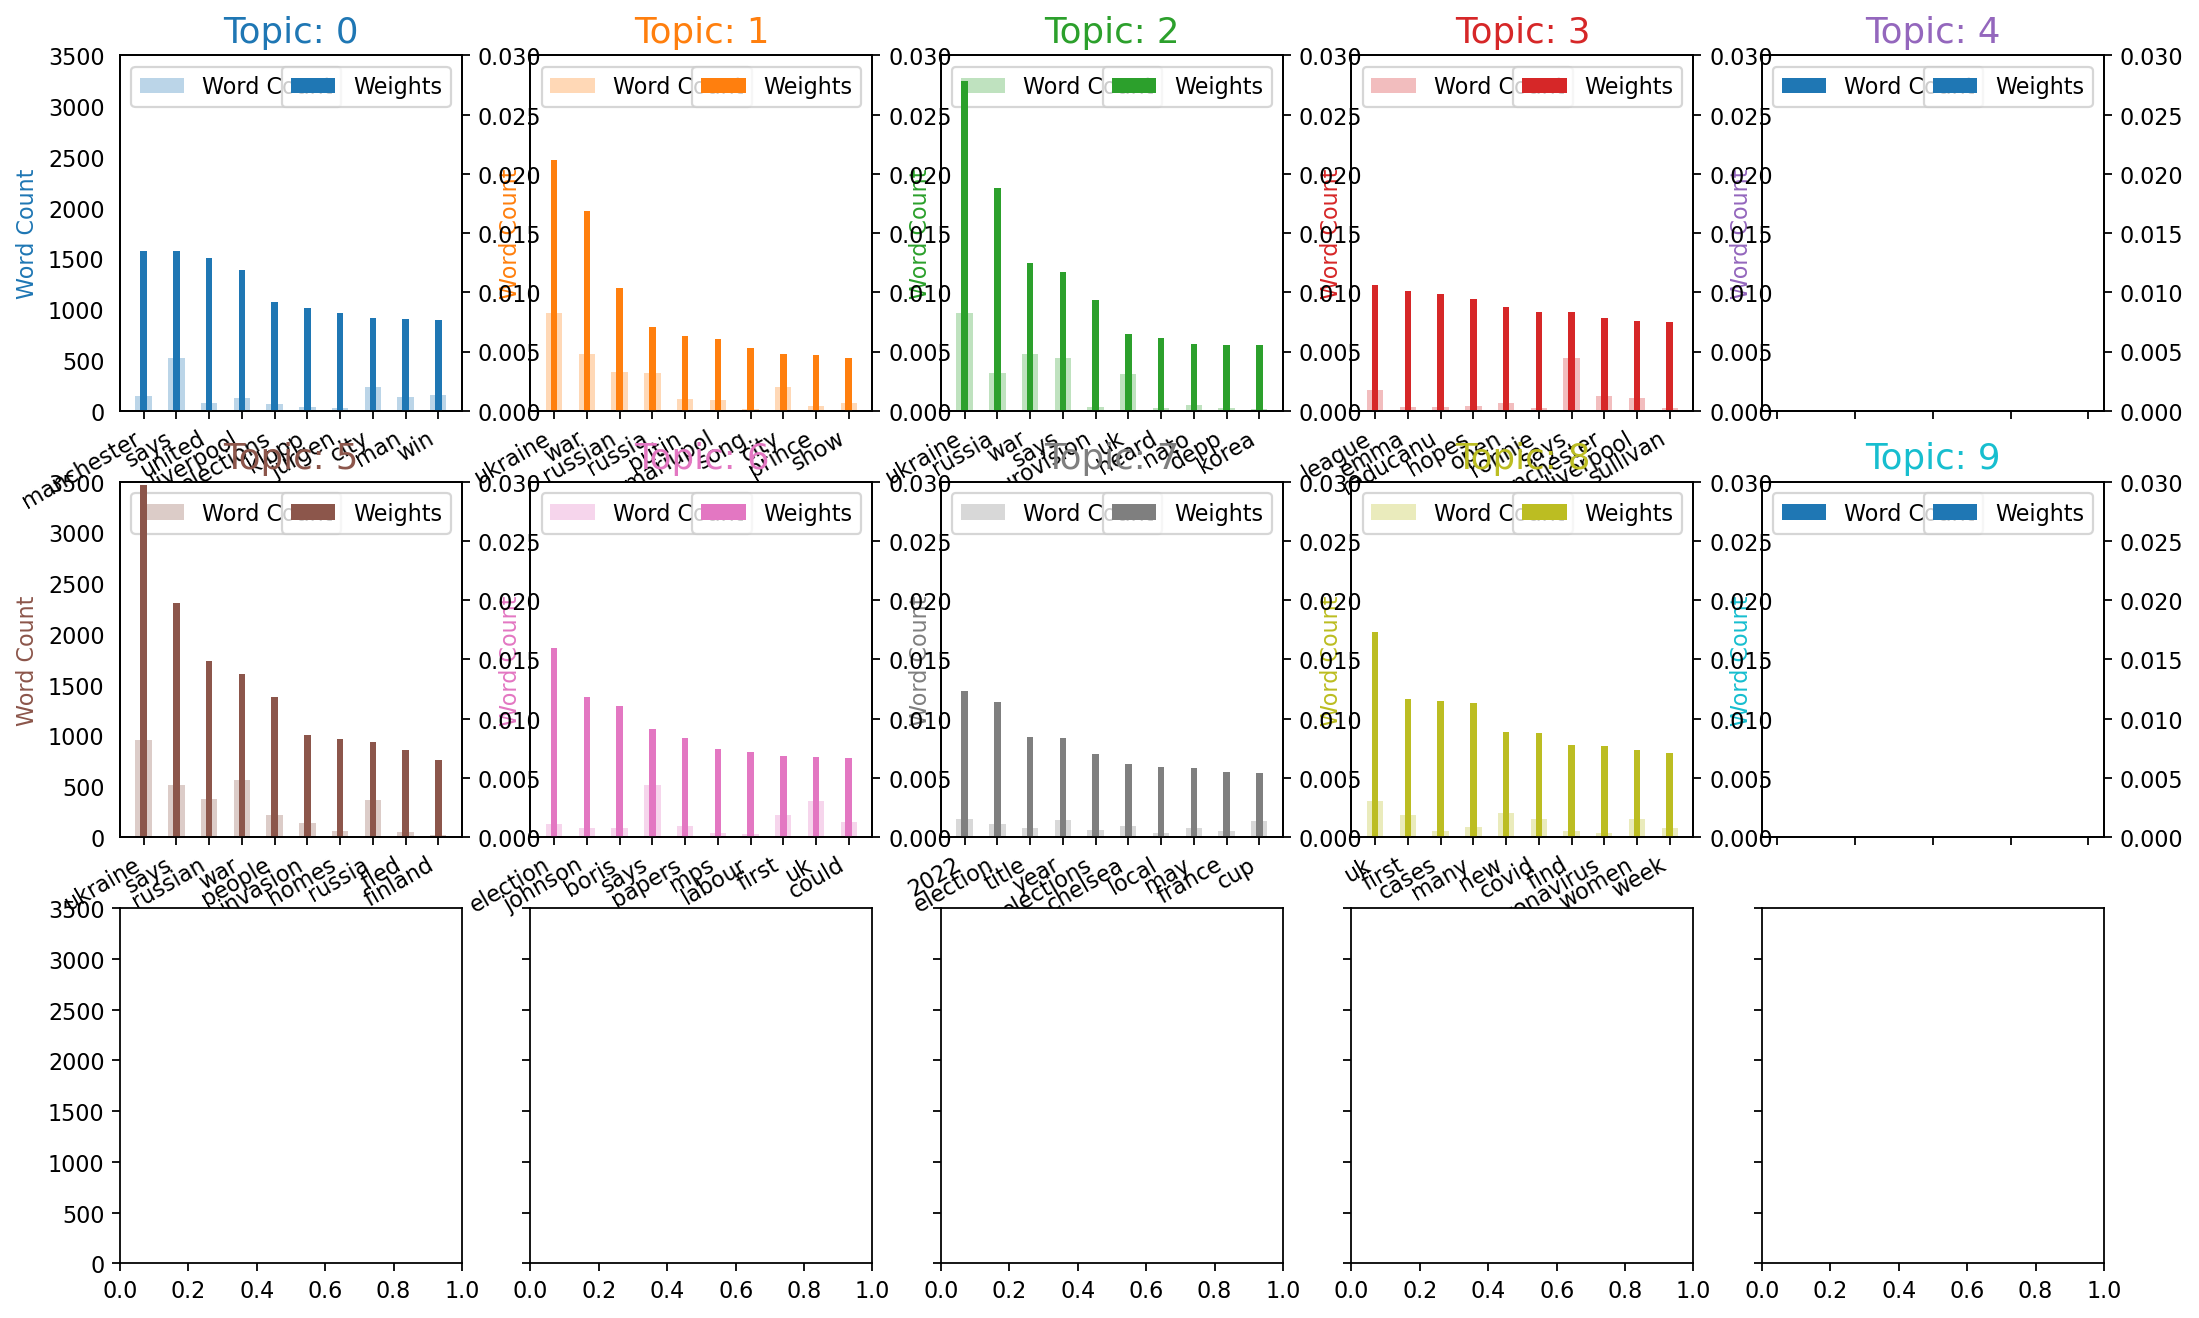

In [22]:
from collections import Counter
import matplotlib.colors as mcolors
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [23]:
cols

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']